In [1]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

In [2]:
from data_processor import DataProcessor
file_path = "../data/raw/data_factory_2.csv"
dp = DataProcessor(file_path)
dp.change_pivot('site_date_tz','param_name','display_value')
dp.drop_NA_with_feature(features=['PrimaryPressure','FeedTemperature'])
dp.rename_column_to_timestamp('site_date_tz')

In [3]:
dp.list_columns()

['timestamp', 'ConcentrateFlowRate', 'FeedConductivity', 'FeedFlowRate', 'FeedTemperature', 'MembraneDifferentialPressure', 'PermeateConductivity', 'PermeateFlowRate', 'PermeatePressure', 'PrimaryPressure', 'Recovery']


['timestamp',
 'ConcentrateFlowRate',
 'FeedConductivity',
 'FeedFlowRate',
 'FeedTemperature',
 'MembraneDifferentialPressure',
 'PermeateConductivity',
 'PermeateFlowRate',
 'PermeatePressure',
 'PrimaryPressure',
 'Recovery']

In [4]:
dp.rename_column_to_feedflow('FeedFlowRate')
dp.rename_column_to_permeateflow('PermeateFlowRate')
dp.rename_column_to_feedpressure('PrimaryPressure')
dp.rename_column_to_concentrateflow('ConcentrateFlowRate')

In [5]:
dp.list_columns()

['timestamp', 'ConcentrateFlow', 'FeedConductivity', 'FeedFlow', 'FeedTemperature', 'MembraneDifferentialPressure', 'PermeateConductivity', 'PermeateFlow', 'PermeatePressure', 'FeedPressure', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'FeedConductivity',
 'FeedFlow',
 'FeedTemperature',
 'MembraneDifferentialPressure',
 'PermeateConductivity',
 'PermeateFlow',
 'PermeatePressure',
 'FeedPressure',
 'Recovery']

In [6]:
from data_processor import CycleProcessor
cp = CycleProcessor(column_name='FeedFlow', df = dp.df, threshold=20)

In [7]:
cp.identify_cycles()
cp.assign_cycle_features()

param_name,timestamp,ConcentrateFlow,FeedConductivity,FeedFlow,FeedTemperature,MembraneDifferentialPressure,PermeateConductivity,PermeateFlow,PermeatePressure,FeedPressure,Recovery,cycle_id,cycle_time
0,2023-05-01 00:00:00,NaN,228.875,436.5375,49.26563,67.18750,4.38750,343.6000,NaN,276.2813,78.74181,-1,-1
1,2023-05-01 00:01:00,NaN,229.125,436.2750,49.20000,68.62500,4.38750,343.2875,NaN,276.5000,78.70036,-1,-1
2,2023-05-01 00:02:00,NaN,228.750,436.0125,49.16250,68.40625,4.36875,343.1875,NaN,276.2500,78.72401,-1,-1
3,2023-05-01 00:03:00,NaN,227.875,436.7625,49.20938,68.40625,4.36250,343.7000,NaN,276.5938,78.68590,-1,-1
4,2023-05-01 00:04:00,NaN,227.000,437.0625,49.17188,67.00000,4.35000,343.9750,NaN,276.3750,78.69297,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385439,2025-05-25 13:49:00,80.975,231.500,427.6875,56.45625,26.96875,4.53750,346.7125,NaN,272.0313,81.05801,-1,-1
385440,2025-05-25 13:50:00,81.100,232.375,430.5375,56.23125,26.81250,4.53125,349.4375,NaN,272.5625,81.16309,-1,-1
385441,2025-05-25 13:51:00,81.075,232.500,430.2000,56.37188,26.34375,4.54375,349.1250,NaN,272.8750,81.17155,-1,-1
385442,2025-05-25 13:52:00,80.975,232.625,429.7500,56.30625,27.43750,4.53125,348.7750,NaN,274.6875,81.14310,-1,-1


In [8]:
# file_path = '../data/cycle_processing_data/factory2.csv'
# cp.export_files(file_path) 

In [9]:
# from utils.plot.plot_by_cycle import interactive_cycle_plot,plot_by_cycle
# interactive_cycle_plot(cp.df, plot_by_cycle)

In [10]:
# from utils.plot.plot_by_time_period import PlotByTimePeriod

# pbt = PlotByTimePeriod(cp.df)
# month = ['2023-11', '2023-12','2024-01']
# pbt.plot_by_month(month,'FeedFlowRate')

In [11]:
# from utils.IQR import iqr
# features = dp.list_columns()
# features = [f for f in features if f not in ['timestamp']]
# iqr(dp.df, features)

In [12]:
from feature_engineering import FeatureEngineering
fe = FeatureEngineering(dp)

In [13]:
fe.generate_cross_features(drop_features=['Recovery', 'PermeateFlow', 'PermeateConductivity', 'PermeatePressure'])
fe.lag_engineer()

In [14]:
# from model.coarse_feature_selection.cfs import random_forest_regressor

In [15]:
dp.df = fe.df
features =dp.df.columns.tolist()

In [16]:
fs = [f for f in features if f != ''and 'timestamp' not in f and 'PermeatePressure' not in f and 'PermeateConductivity' not in f and f not in ['PermeateFlowRate'] ]
#and'Permeate' not in f 
print(fs)

['ConcentrateFlow', 'FeedConductivity', 'FeedFlow', 'FeedTemperature', 'MembraneDifferentialPressure', 'PermeateFlow', 'FeedPressure', 'Recovery', 'cycle_id', 'cycle_time', 'ConcentrateFlow_x_FeedConductivity', 'ConcentrateFlow_x_FeedFlow', 'ConcentrateFlow_x_FeedTemperature', 'ConcentrateFlow_x_MembraneDifferentialPressure', 'ConcentrateFlow_x_FeedPressure', 'FeedConductivity_x_FeedFlow', 'FeedConductivity_x_FeedTemperature', 'FeedConductivity_x_MembraneDifferentialPressure', 'FeedConductivity_x_FeedPressure', 'FeedFlow_x_FeedTemperature', 'FeedFlow_x_MembraneDifferentialPressure', 'FeedFlow_x_FeedPressure', 'FeedTemperature_x_MembraneDifferentialPressure', 'FeedTemperature_x_FeedPressure', 'MembraneDifferentialPressure_x_FeedPressure', 'ConcentrateFlow_lag_1', 'ConcentrateFlow_lag_2', 'ConcentrateFlow_lag_3', 'ConcentrateFlow_lag_6', 'ConcentrateFlow_lag_12', 'FeedConductivity_lag_1', 'FeedConductivity_lag_2', 'FeedConductivity_lag_3', 'FeedConductivity_lag_6', 'FeedConductivity_lag_

In [17]:
# top_k_features = random_forest_regressor(dp, 'PermeateFlowRate', fs, plant_name='plant2')

In [18]:
import pandas as pd
import numpy as np
top_k_features = pd.read_csv("../data/temp_data/top_k_features_plant1.csv")
top_k_features

,Unnamed: 0,0
0,0,PermeateFlow_lag_1
1,1,FeedFlow
2,2,Recovery
3,3,FeedConductivity_x_FeedFlow
4,4,PermeateFlow_lag_2
5,5,ConcentrateFlow_x_FeedFlow
6,6,FeedFlow_x_FeedTemperature
7,7,Recovery_lag_1
8,8,PermeateFlow_lag_3
9,9,FeedPressure


In [19]:
top_k_features = top_k_features.iloc[:,1].tolist()
top_k_features

['PermeateFlow_lag_1',
 'FeedFlow',
 'Recovery',
 'FeedConductivity_x_FeedFlow',
 'PermeateFlow_lag_2',
 'ConcentrateFlow_x_FeedFlow',
 'FeedFlow_x_FeedTemperature',
 'Recovery_lag_1',
 'PermeateFlow_lag_3',
 'FeedPressure']

In [20]:
target = ['PermeateFlow']
# from model.fine_feature_selection.ffs import fine_feature_selection
# s_features = fine_feature_selection(dp, top_k_features, target)

In [21]:
# from model.lstm_model.enhanced_lstm import lstm_model
# lstm_model(dp, top_k_features, target)

In [22]:
from model.load_model.load_model import load_model
import torch
X_train = dp.df[top_k_features]
model_path = "../model/model_weights.pth"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = load_model(model_path=model_path, X_train=X_train, device=device)

In [27]:
y = dp.df[top_k_features]
y

,PermeateFlow_lag_1,FeedFlow,Recovery,FeedConductivity_x_FeedFlow,PermeateFlow_lag_2,ConcentrateFlow_x_FeedFlow,FeedFlow_x_FeedTemperature,Recovery_lag_1,PermeateFlow_lag_3,FeedPressure
0,NaN,436.5375,78.74181,99912.520313,NaN,NaN,21506.294956,NaN,NaN,276.2813
1,343.6000,436.2750,78.70036,99961.509375,NaN,NaN,21464.730000,78.74181,NaN,276.5000
2,343.2875,436.0125,78.72401,99737.859375,343.6000,NaN,21435.464531,78.70036,NaN,276.2500
3,343.1875,436.7625,78.68590,99527.254687,343.2875,NaN,21492.811832,78.72401,343.6000,276.5938
4,343.7000,437.0625,78.69297,99213.187500,343.1875,NaN,21491.184802,78.68590,343.2875,276.3750
...,...,...,...,...,...,...,...,...,...,...
385439,347.3125,427.6875,81.05801,99009.656250,345.7500,34631.995313,24145.632422,81.22843,343.6000,272.0313
385440,346.7125,430.5375,81.16309,100046.151563,347.3125,34916.591250,24209.661797,81.05801,345.7500,272.5625
385441,349.4375,430.2000,81.17155,100021.500000,346.7125,34878.465000,24251.182776,81.16309,347.3125,272.8750
385442,349.1250,429.7500,81.14310,99970.593750,349.4375,34799.006250,24197.610937,81.17155,346.7125,274.6875


警告: 输入数据包含 280784 个 NaN 值，已自动删除


D:\desktop\RO\src\data_loader\data_set.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(X_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)


评估指标 (基于索引 50000 到 55000 的 4989 个样本):
MAE: 345.0312
MSE: 119422.2578
RMSE: 345.5753
R²: -320.2481


C:\Users\Lenovo\anaconda3\envs\ro\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\anaconda3\envs\ro\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\anaconda3\envs\ro\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\anaconda3\envs\ro\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\anaconda3\envs\ro\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDE

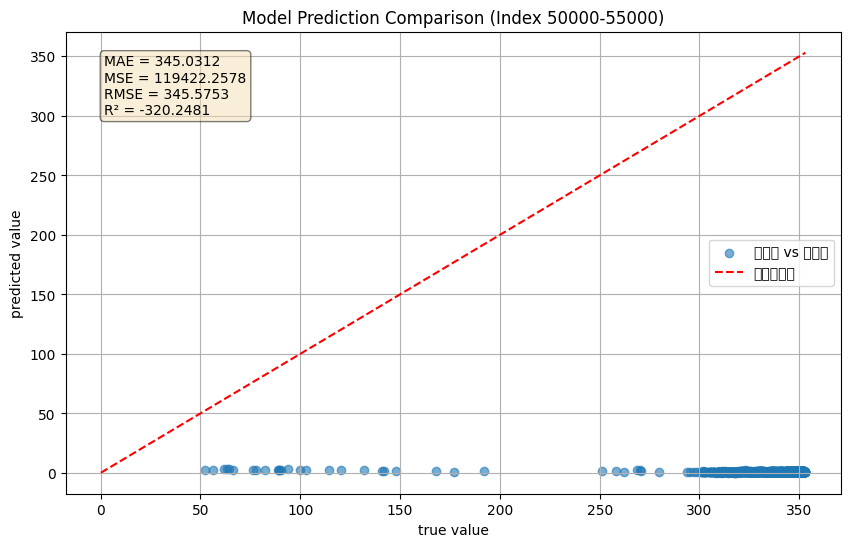

array([1.8394899, 1.8272994, 1.8187507, ..., 1.2972169, 1.5013658,
       1.1231233], shape=(4989,), dtype=float32)

In [28]:
from utils.plot.plot_prediction import plot_prediction
y = dp.df['PermeateFlow']
plot_prediction(model, X_train, y, device, n_points=5000, start_idx=50000)